# Loan Application Status Prediction
Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [425]:
#importing essential libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,power_transform
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score,roc_auc_score,roc_curve,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
  

In [426]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [427]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [428]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [429]:
df.sample(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
238,LP001790,Female,No,1,Graduate,No,3812,0.0,112.0,360.0,1.0,Rural,Y
495,LP002586,Female,Yes,1,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban,Y
510,LP002637,Male,No,0,Not Graduate,No,3598,1287.0,100.0,360.0,1.0,Rural,N
408,LP002315,Male,Yes,1,Graduate,No,8300,0.0,152.0,300.0,0.0,Semiurban,N


In [430]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [431]:
type(df)

pandas.core.frame.DataFrame

In [432]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [433]:
type(df.columns)

pandas.core.indexes.base.Index

## Check duplicates:

In [434]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [435]:
df.duplicated().values.any()

False

## Check null values:

In [436]:
df.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [437]:
df.isnull().sum().sum()

149

In [438]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<AxesSubplot:>

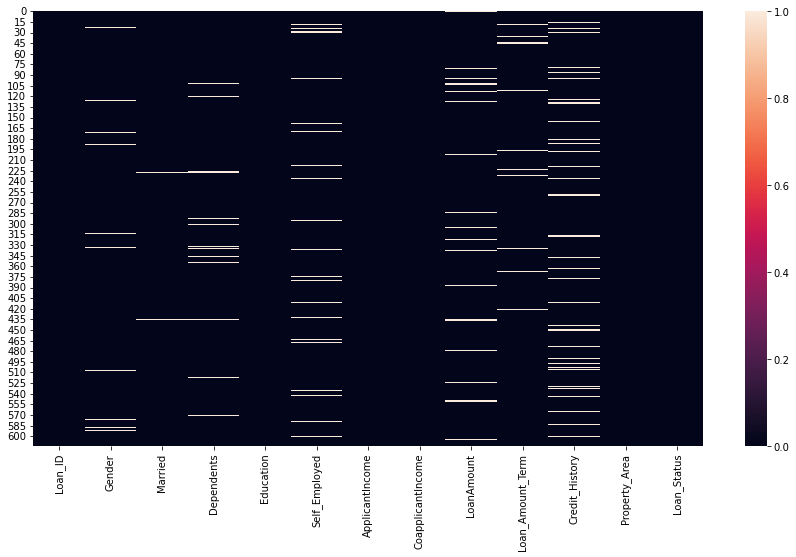

In [440]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull())

##### total 149 null values are present

## Imputation:

In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [442]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [443]:
df['Gender'].fillna('missing',inplace=True)
df['Married'].fillna('missing',inplace=True)
df['Self_Employed'].fillna('-',inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)
df['Dependents'].fillna('-',inplace=True)


In [444]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [445]:
df=df.drop(['Loan_ID'],axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


## Visualisation:

#### lineplot to understand the data by visualisation:

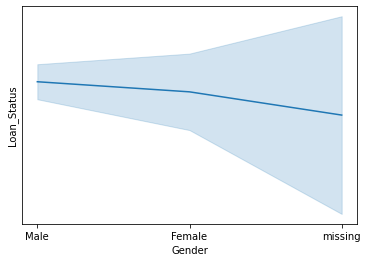

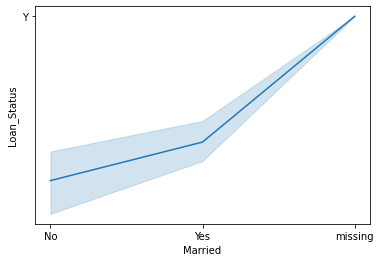

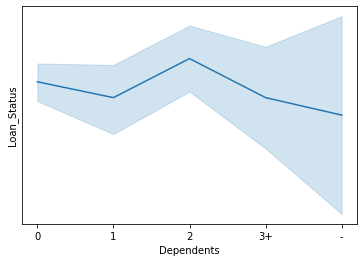

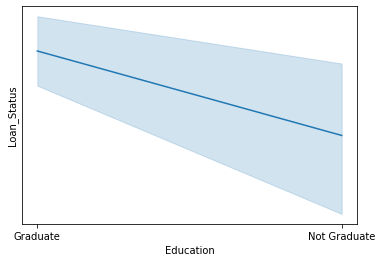

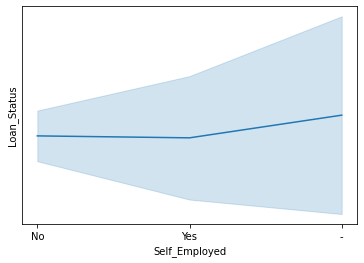

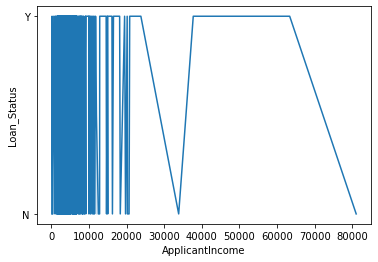

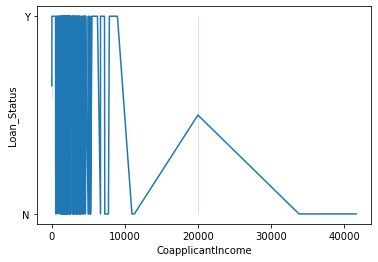

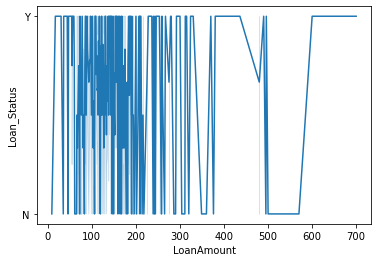

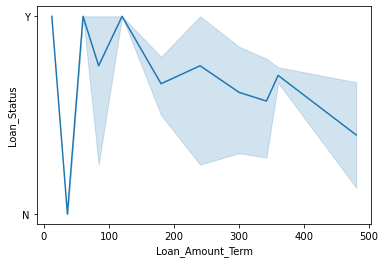

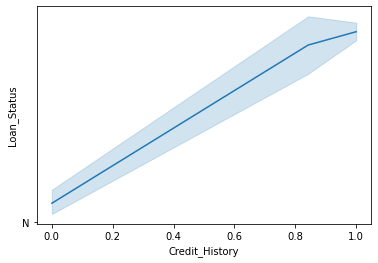

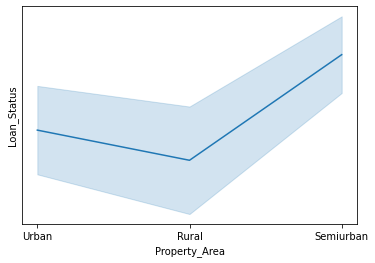

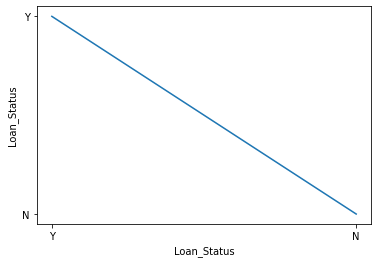

In [446]:
for i in df.columns[0:]:
    plt.figure()
    sns.lineplot(x=df[i],y='Loan_Status',data=df)

##### As we can visualise that,the males are taking more loans than women but the difference is not so much varies.
Married are taking more loan than unmarried.
dependence of two persons are shows high peak.
since Graduate are taking more loan than ungraduate.
loan status does not showa variation in whether the employee or self employed.
Around 4000 to 7000 approximately applications are came for loan.
Loan amount shows constant while for 400 to 500 ande 600  to 700.
loan amount term shows high peak in between 50 to 150.
credit history is more needed.
semiurban shows high peak for loan status.


([<matplotlib.patches.Wedge at 0x11da797dcd0>,
 [Text(-0.6937978290047497, 1.0397810214022452, 'Y'),
  Text(0.6105420038550106, -0.9150073559970479, 'N')],
 [Text(-0.41627869740284984, 0.623868612841347, '68.73%'),
  Text(0.3330229111936421, -0.49909492145293516, '31.27%')])

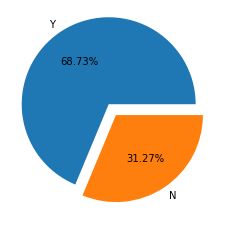

In [447]:
plt.pie(df['Loan_Status'].value_counts().values,labels=df['Loan_Status'].value_counts().index,autopct='%1.2f%%',explode=(.15,0))

([<matplotlib.patches.Wedge at 0x11da7af55b0>,
 [Text(-0.9181191561394509, 0.6058524697727844, 'No'),
  Text(0.8070858660351158, -0.7474037763126083, 'Yes'),
  Text(1.085288563964543, -0.17930067743257497, '-')],
 [Text(-0.500792266985155, 0.3304649835124278, '81.43%'),
  Text(0.4402286542009722, -0.40767478707960453, '13.36%'),
  Text(0.5919755803442961, -0.09780036950867724, '5.21%')])

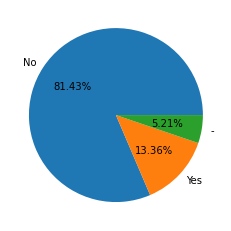

In [448]:

plt.pie(df['Self_Employed'].value_counts().values,labels=df['Self_Employed'].value_counts().index,autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x11da728f1f0>,
 [Text(-0.8514262161117528, 0.6964721089301588, 'Graduate'),
  Text(0.8514262161117524, -0.6964721089301593, 'Not Graduate')],
 [Text(-0.4644142996973196, 0.37989387759826837, '78.18%'),
  Text(0.46441429969731945, -0.37989387759826865, '21.82%')])

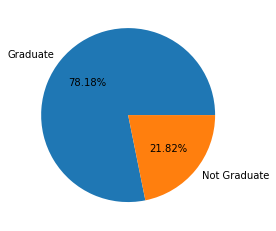

In [449]:
plt.pie(df['Education'].value_counts().values,labels=df['Education'].value_counts().index,autopct='%1.2f%%')

##### since we can see that no. of percentages of graduates are high than than non graduate for applying the loan. 

([<matplotlib.patches.Wedge at 0x11da7149cd0>,
 [Text(-0.8825844093554915, 0.6565399914419672, 'Male'),
  Text(0.8369945960283519, -0.7137506891200429, 'Female'),
  Text(1.0975675014134119, -0.07311347236399363, 'missing')],
 [Text(-0.481409677830268, 0.35811272260470933, '79.64%'),
  Text(0.45654250692455556, -0.3893185577018416, '18.24%'),
  Text(0.5986731825891336, -0.03988007583490561, '2.12%')])

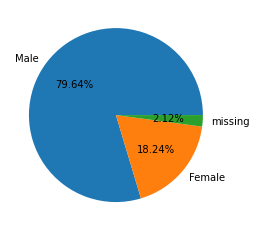

In [450]:
plt.pie(df['Gender'].value_counts().values,labels=df['Gender'].value_counts().index,autopct='%1.2f%%')

##### Percentage for female for applying the laon are less than male

([<matplotlib.patches.Wedge at 0x11da7e88a60>,
 [Text(-0.49386527900841193, 0.982902378769094, 'Yes'),
  Text(0.47872021789492547, -0.990367079914632, 'No'),
  Text(1.0998704095268506, -0.016884378793376967, 'missing')],
 [Text(-0.26938106127731554, 0.5361285702376876, '64.82%'),
  Text(0.2611201188517775, -0.5402002254079811, '34.69%'),
  Text(0.599929314287373, -0.009209661160023799, '0.49%')])

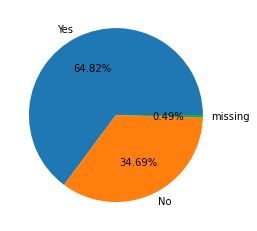

In [451]:
plt.pie(df['Married'].value_counts().values,labels=df['Married'].value_counts().index,autopct='%1.2f%%')

##### no. of percentage of taking loan of Married are more than non Married

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>,
        <AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>,
        <AxesSubplot:title={'center':'Credit_History'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

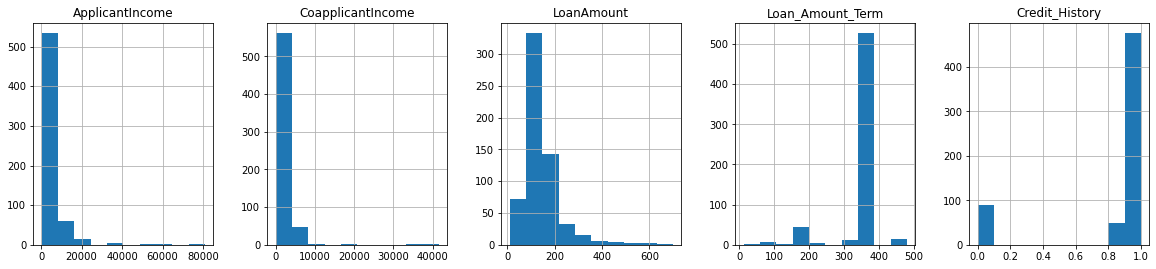

In [452]:
df.hist(figsize=(20,20,),grid=True,layout=(4,5),bins=10)

## Encoding:

In [467]:
df['Gender'].replace('Female',1,inplace=True)
df['Gender'].replace('Male',2,inplace=True)

In [468]:
df['Gender'].unique()

array([2, 1, 'missing'], dtype=object)

In [494]:
df['Gender'].replace('-', 0,inplace=True)
df['Gender'].replace('missing', 0,inplace=True)


In [470]:
df['Married'].replace('No',1,inplace=True)
df['Married'].replace('Yes',2,inplace=True)
df['Married'].replace('missing',0,inplace=True)

In [471]:
df['Education'].replace('Graduate',1,inplace=True)
df['Education'].replace('Not Graduate',2,inplace=True)


In [472]:
df['Self_Employed'].replace('No',1,inplace=True)
df['Self_Employed'].replace('Yes',2,inplace=True)
df['Self_Employed'].replace('-',0,inplace=True)


In [473]:
df['Loan_Status'].replace('Y',2,inplace=True)
df['Loan_Status'].replace('N',1,inplace=True)
df['Loan_Status'].unique()

array([2, 1], dtype=int64)

In [474]:
df['Property_Area'].replace('Semiurban',1,inplace=True)
df['Property_Area'].replace('Rural',3,inplace=True)
df['Property_Area'].replace('Urban',2,inplace=True)
df['Property_Area'].unique()

array([2, 3, 1], dtype=int64)

In [475]:
df['Dependents'].replace('-',0,inplace=True)

In [476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 57.7+ KB


In [515]:
df.sample(8)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
266,2,2,2,1,1,4708,1387.0,150.0,360.0,1.0,1,2
498,2,2,1,1,2,2895,0.0,95.0,360.0,1.0,1,2
28,2,1,0,2,1,1442,0.0,35.0,360.0,1.0,2,1
448,2,2,2,1,1,3340,1710.0,150.0,360.0,0.0,3,1
50,1,2,0,2,1,1928,1644.0,100.0,360.0,1.0,1,2
76,2,1,0,1,1,3750,4750.0,176.0,360.0,1.0,2,1
532,2,1,2,1,1,3588,0.0,110.0,360.0,0.0,3,1
427,2,2,2,1,1,5935,0.0,133.0,360.0,1.0,1,2


In [529]:
df['Dependents'].replace('3+',3,inplace=True)
df['Dependents'].unique()

array(['0', '1', '2', 3, 0], dtype=object)

In [530]:
df.astype(int)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2,1,0,1,1,5849,0,146,360,1,2,2
1,2,2,1,1,1,4583,1508,128,360,1,3,1
2,2,2,0,1,2,3000,0,66,360,1,2,2
3,2,2,0,2,1,2583,2358,120,360,1,2,2
4,2,1,0,1,1,6000,0,141,360,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,1,0,1,1,2900,0,71,360,1,3,2
610,2,2,3,1,1,4106,0,40,180,1,3,2
611,2,2,1,1,1,8072,240,253,360,1,2,2
612,2,2,2,1,1,7583,0,187,360,1,2,2


In [531]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 57.7+ KB


## Correlation:

In [532]:
df.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.277459,0.068774,-0.031116,-0.024689,0.073642,0.022241,-0.060394,0.032801,0.098244,0.029040
Married,0.277459,1.000000,0.022530,0.030171,0.047691,0.083270,0.141196,-0.103747,-0.003329,0.007112,0.075547
Education,0.068774,0.022530,1.000000,0.000820,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,0.066740,-0.085884
Self_Employed,-0.031116,0.030171,0.000820,1.000000,0.092967,-0.052384,0.082292,-0.017594,-0.035999,-0.007574,-0.011332
ApplicantIncome,-0.024689,0.047691,-0.140760,0.092967,1.000000,-0.116605,0.565620,-0.045242,-0.014477,0.017321,-0.004710
CoapplicantIncome,0.073642,0.083270,-0.062290,-0.052384,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.019087,-0.059187
LoanAmount,0.022241,0.141196,-0.166998,0.082292,0.565620,0.187828,1.000000,0.038801,-0.007738,0.029024,-0.036416
Loan_Amount_Term,-0.060394,-0.103747,-0.077242,-0.017594,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.017349,-0.020974
Credit_History,0.032801,-0.003329,-0.077936,-0.035999,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.035519,0.540483
Property_Area,0.098244,0.007112,0.066740,-0.007574,0.017321,0.019087,0.029024,-0.017349,-0.035519,1.000000,-0.137545


<AxesSubplot:>

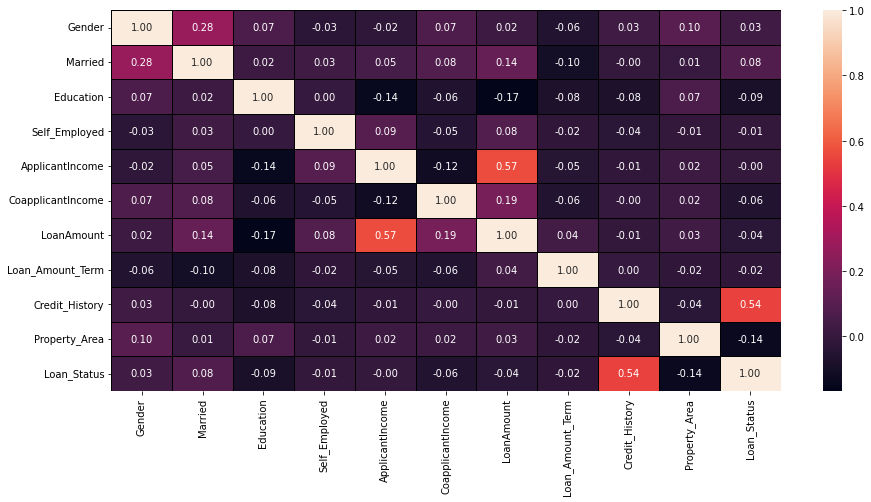

In [533]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

In [534]:
df.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,1.775244,1.643322,1.218241,1.081433,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.912052,1.687296
std,0.465767,0.489511,0.413389,0.423472,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.815081,0.463973
min,0.000000,0.000000,1.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000,1.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,2.000000,2.000000
75%,2.000000,2.000000,1.000000,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,3.000000,2.000000
max,2.000000,2.000000,2.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,3.000000,2.000000


In [535]:
round(df.describe().transpose(),2)

,count,mean,std,min,25%,50%,75%,max
Gender,614.0,1.78,0.47,0.0,2.00,2.0,2.00,2.0
Married,614.0,1.64,0.49,0.0,1.00,2.0,2.00,2.0
Education,614.0,1.22,0.41,1.0,1.00,1.0,1.00,2.0
Self_Employed,614.0,1.08,0.42,0.0,1.00,1.0,1.00,2.0
ApplicantIncome,614.0,5403.46,6109.04,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.25,2926.25,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.41,84.04,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.00,64.37,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.84,0.35,0.0,1.00,1.0,1.00,1.0
Property_Area,614.0,1.91,0.82,1.0,1.00,2.0,3.00,3.0


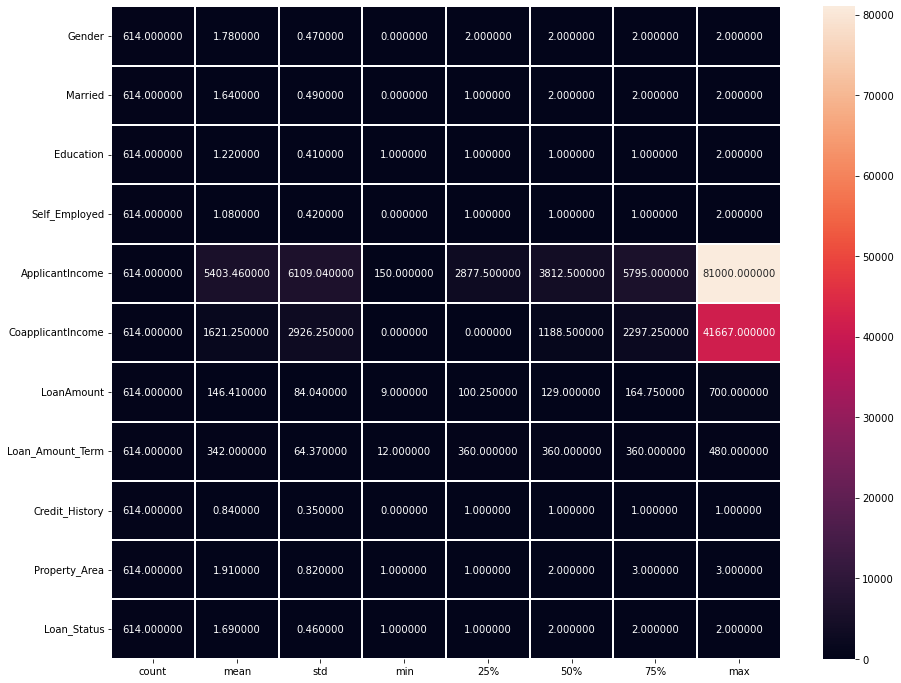

In [536]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe().transpose(),2),linewidth=2,annot=True,fmt="f")

plt.savefig('heatmap.png')
plt.show()

In [537]:
df.corr()['Loan_Status'].sort_values()

Property_Area       -0.137545
Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.020974
Self_Employed       -0.011332
ApplicantIncome     -0.004710
Gender               0.029040
Married              0.075547
Credit_History       0.540483
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

## distribution curve:

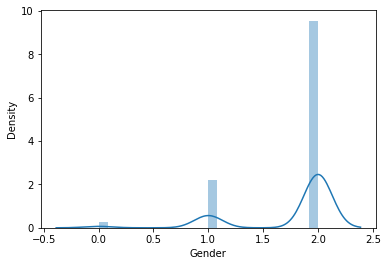

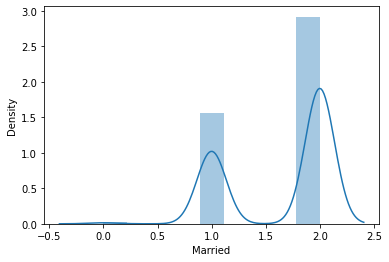

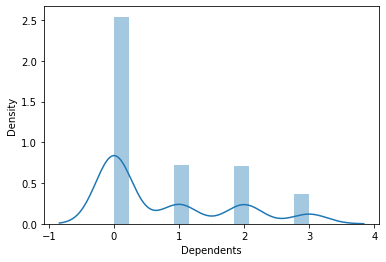

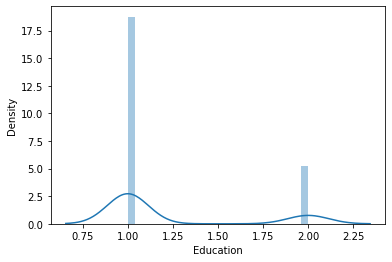

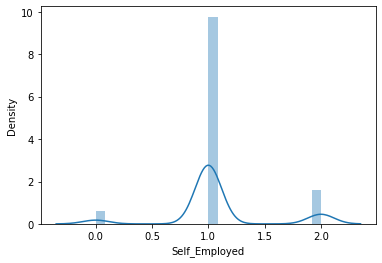

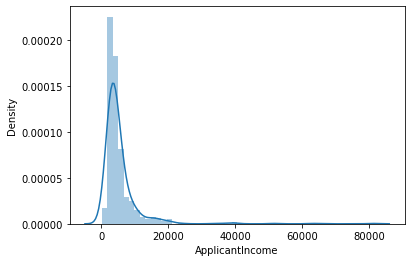

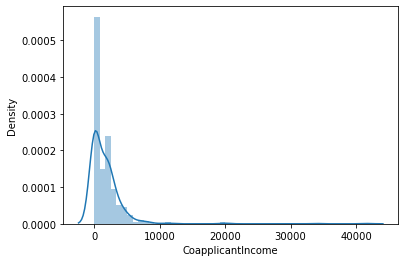

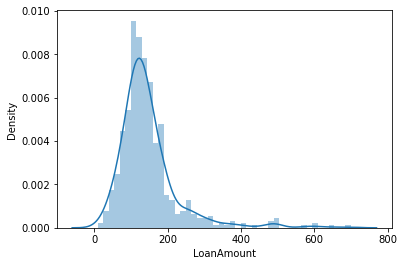

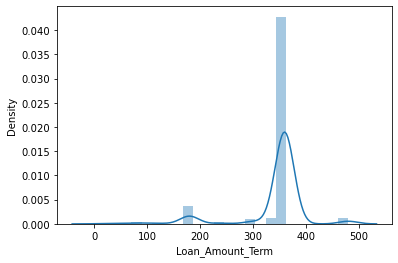

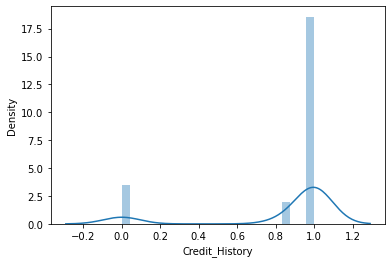

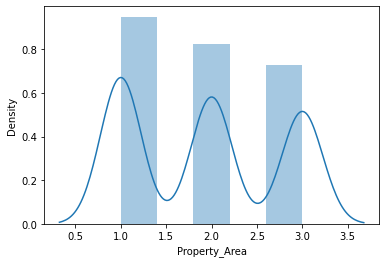

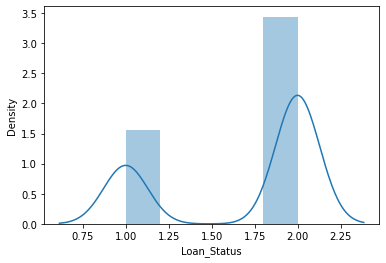

In [538]:
for i in df.columns[0:17]:
    plt.figure()
    sns.distplot( df[i])

##### distribution curve is shows the skewness of the data.

In [539]:
df.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of      Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         2        1          0          1              1             5849   
1         2        2          1          1              1             4583   
2         2        2          0          1              2             3000   
3         2        2          0          2              1             2583   
4         2        1          0          1              1             6000   
..      ...      ...        ...        ...            ...              ...   
609       1        1          0          1              1             2900   
610       2        2          3          1              1             4106   
611       2        2          1          1              1             8072   
612       2        2          2          1              1             7583   
613       1        1          0          1              2             4583   



## outliers:

Gender                  AxesSubplot(0.125,0.837584;0.133621x0.0424157)
Married              AxesSubplot(0.285345,0.837584;0.133621x0.0424157)
Education             AxesSubplot(0.44569,0.837584;0.133621x0.0424157)
Self_Employed        AxesSubplot(0.606034,0.837584;0.133621x0.0424157)
ApplicantIncome      AxesSubplot(0.766379,0.837584;0.133621x0.0424157)
CoapplicantIncome       AxesSubplot(0.125,0.786685;0.133621x0.0424157)
LoanAmount           AxesSubplot(0.285345,0.786685;0.133621x0.0424157)
Loan_Amount_Term      AxesSubplot(0.44569,0.786685;0.133621x0.0424157)
Credit_History       AxesSubplot(0.606034,0.786685;0.133621x0.0424157)
Property_Area        AxesSubplot(0.766379,0.786685;0.133621x0.0424157)
Loan_Status             AxesSubplot(0.125,0.735787;0.133621x0.0424157)
dtype: object

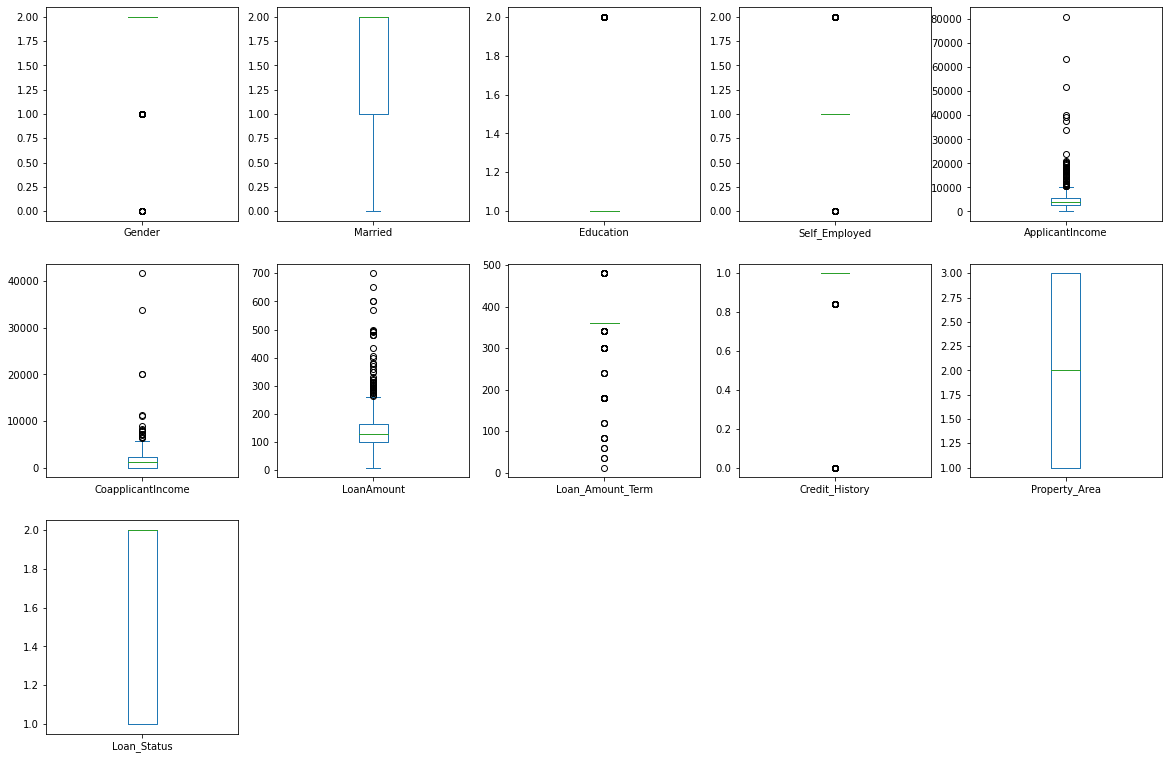

In [540]:
df.plot(kind='box', subplots=True, layout=(15,5),figsize=(20,70))

## Variables:

In [541]:
x=df.drop(columns=['Loan_Status'],axis=1)
y=df['Loan_Status']


In [542]:
x.shape,y.shape

((614, 11), (614,))

## Transformation of data to remove skewness:

In [543]:
x=power_transform(x,method='yeo-johnson')


In [544]:
type(x)

numpy.ndarray

In [545]:
x.ndim

2

In [546]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.5055789 , -1.3515401 , -0.82710431, ...,  0.18590509,
         0.51406263,  0.2301878 ],
       [ 0.5055789 ,  0.73642374,  0.85425912, ...,  0.18590509,
         0.51406263,  1.26172476],
       [ 0.5055789 ,  0.73642374, -0.82710431, ...,  0.18590509,
         0.51406263,  0.2301878 ],
       ...,
       [ 0.5055789 ,  0.73642374,  0.85425912, ...,  0.18590509,
         0.51406263,  0.2301878 ],
       [ 0.5055789 ,  0.73642374,  1.31670248, ...,  0.18590509,
         0.51406263,  0.2301878 ],
       [-1.97229751, -1.3515401 , -0.82710431, ...,  0.18590509,
        -2.2471956 , -1.16886982]])

In [547]:
x.mean()

5.391666450652226e-18

In [548]:
x.std()

1.0

In [549]:
df.Loan_Status.value_counts()

2    422
1    192
Name: Loan_Status, dtype: int64

In [550]:
x_train,x_test,y_train,y_test =  train_test_split(x,y, test_size =0.25,random_state=100)

In [551]:
x_train.shape

(460, 11)

In [552]:
y_train.shape

(460,)

In [553]:
x_test.shape

(154, 11)

In [554]:
y_test.shape

(154,)

# model building:

## Regression:

In [555]:
ada=AdaBoostRegressor()
ada.fit(x_test,y_test)

AdaBoostRegressor()

In [556]:
y_pred=ada.predict(x_test)
y_pred.shape

(154,)

In [557]:
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score
import sklearn.metrics as metrics
accuracy=metrics.r2_score(y_test,y_pred)
print('R square score',accuracy)

R square score 0.3362053826464203


In [558]:
LR=LinearRegression()
LR.fit(x_test,y_test)
y_pred=LR.predict(x_test)
y_pred.shape

(154,)

In [559]:
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score
import sklearn.metrics as metrics
accuracy=metrics.r2_score(y_test,y_pred)
print('R square score',accuracy)

R square score 0.22504479462527127


## Classifier:

In [560]:
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import classification_report
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()

model=[RD_model,DT_model,SV_model,KNR_model,ADA_model,GB_model ]

In [561]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*50)

Accuracy_Score of  RidgeClassifier() is 70.12987012987013
Confusion Matrix of  RidgeClassifier()  is 
 [[24 36]
 [10 84]]
              precision    recall  f1-score   support

           1       0.71      0.40      0.51        60
           2       0.70      0.89      0.79        94

    accuracy                           0.70       154
   macro avg       0.70      0.65      0.65       154
weighted avg       0.70      0.70      0.68       154

**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 72.07792207792207
Confusion Matrix of  DecisionTreeClassifier()  is 
 [[37 23]
 [20 74]]
              precision    recall  f1-score   support

           1       0.65      0.62      0.63        60
           2       0.76      0.79      0.77        94

    accuracy                           0.72       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

*************************************

## CrossValidation:

In [562]:
from sklearn.model_selection import cross_val_score
for i in model:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test))*100)
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,x,y,cv=5, scoring='accuracy').mean()*100)
    print('*'*50)

Accuracy_Score of  RidgeClassifier() is 70.12987012987013
cross Validation accuracy score of  RidgeClassifier()  is  79.48287351725976
**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 72.07792207792207
cross Validation accuracy score of  DecisionTreeClassifier()  is  70.19858723177396
**************************************************
Accuracy_Score of  SVC() is 70.77922077922078
cross Validation accuracy score of  SVC()  is  79.80407836865254
**************************************************
Accuracy_Score of  KNeighborsClassifier() is 70.12987012987013
cross Validation accuracy score of  KNeighborsClassifier()  is  75.73104091696655
**************************************************
Accuracy_Score of  AdaBoostClassifier() is 74.02597402597402
cross Validation accuracy score of  AdaBoostClassifier()  is  79.96801279488204
**************************************************
Accuracy_Score of  GradientBoostingClassifier() is 70.7792207792

## Gridsearch:

In [563]:
#Checking the best parameter for prediction of KNeighborsClassifier Algo using Gridsearchcv
x_train,x_test, y_train, y_test=train_test_split(x,y, random_state = 100, test_size = 0.33)

KNC = KNeighborsClassifier()
parameters={'n_neighbors':range(1,30)}
gridsearch=GridSearchCV(KNC,parameters)
gridsearch.fit(x_train, y_train)
gridsearch.best_params_


{'n_neighbors': 14}

In [564]:
GCV_pred=gridsearch.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.7586206896551724

## ROC AUC curve:

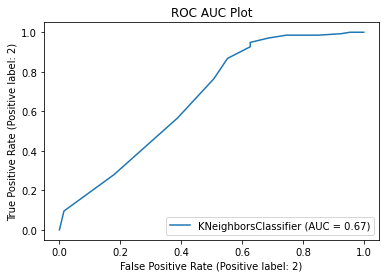

In [565]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

plot_roc_curve(gridsearch.best_estimator_,x_test,y_test)
plt.title('ROC AUC Plot')
plt.show()

## Conclusion:

###### Amazingly classification model worked better than all other Ensemble models. The accuracy score RidgeClassifier()  is  79.48287351725976